In [21]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [22]:
a = np.logspace(-0.5, 2.0, 1000)
ecc = np.linspace(0, 1, 1001)
inc = np.linspace(0, 180, 1002)

grid_shape = (len(a), len(ecc), len(inc))

In [23]:
densities = np.load("new_densities.npy")

In [24]:
normalised_density = densities / densities.sum()
cumulative_density = normalised_density.cumsum()

In [25]:
random_values = np.random.rand(int(1e8))

In [26]:
pixels = np.searchsorted(cumulative_density, random_values)

In [27]:
a_ind, e_ind, i_ind = np.unravel_index(pixels, shape=grid_shape)

In [28]:
# clunky fix TODO: check with Mario
a_ind[a_ind == 49] = 48
e_ind[e_ind == 50] = 49
i_ind[i_ind == 51] = 50

In [29]:
da = np.log10(a[1]) - np.log10(a[0])
random_loga = np.random.rand(len(a_ind)) * da + np.log10(a[a_ind])

de = ecc[1] - ecc[0]
random_e = np.random.rand(len(e_ind)) * de + ecc[e_ind]

di = inc[1] - inc[0]
random_i = np.random.rand(len(i_ind)) * di + inc[i_ind]

In [34]:
mpcorb = pd.read_hdf("../catalogues/mpcorb.h5")

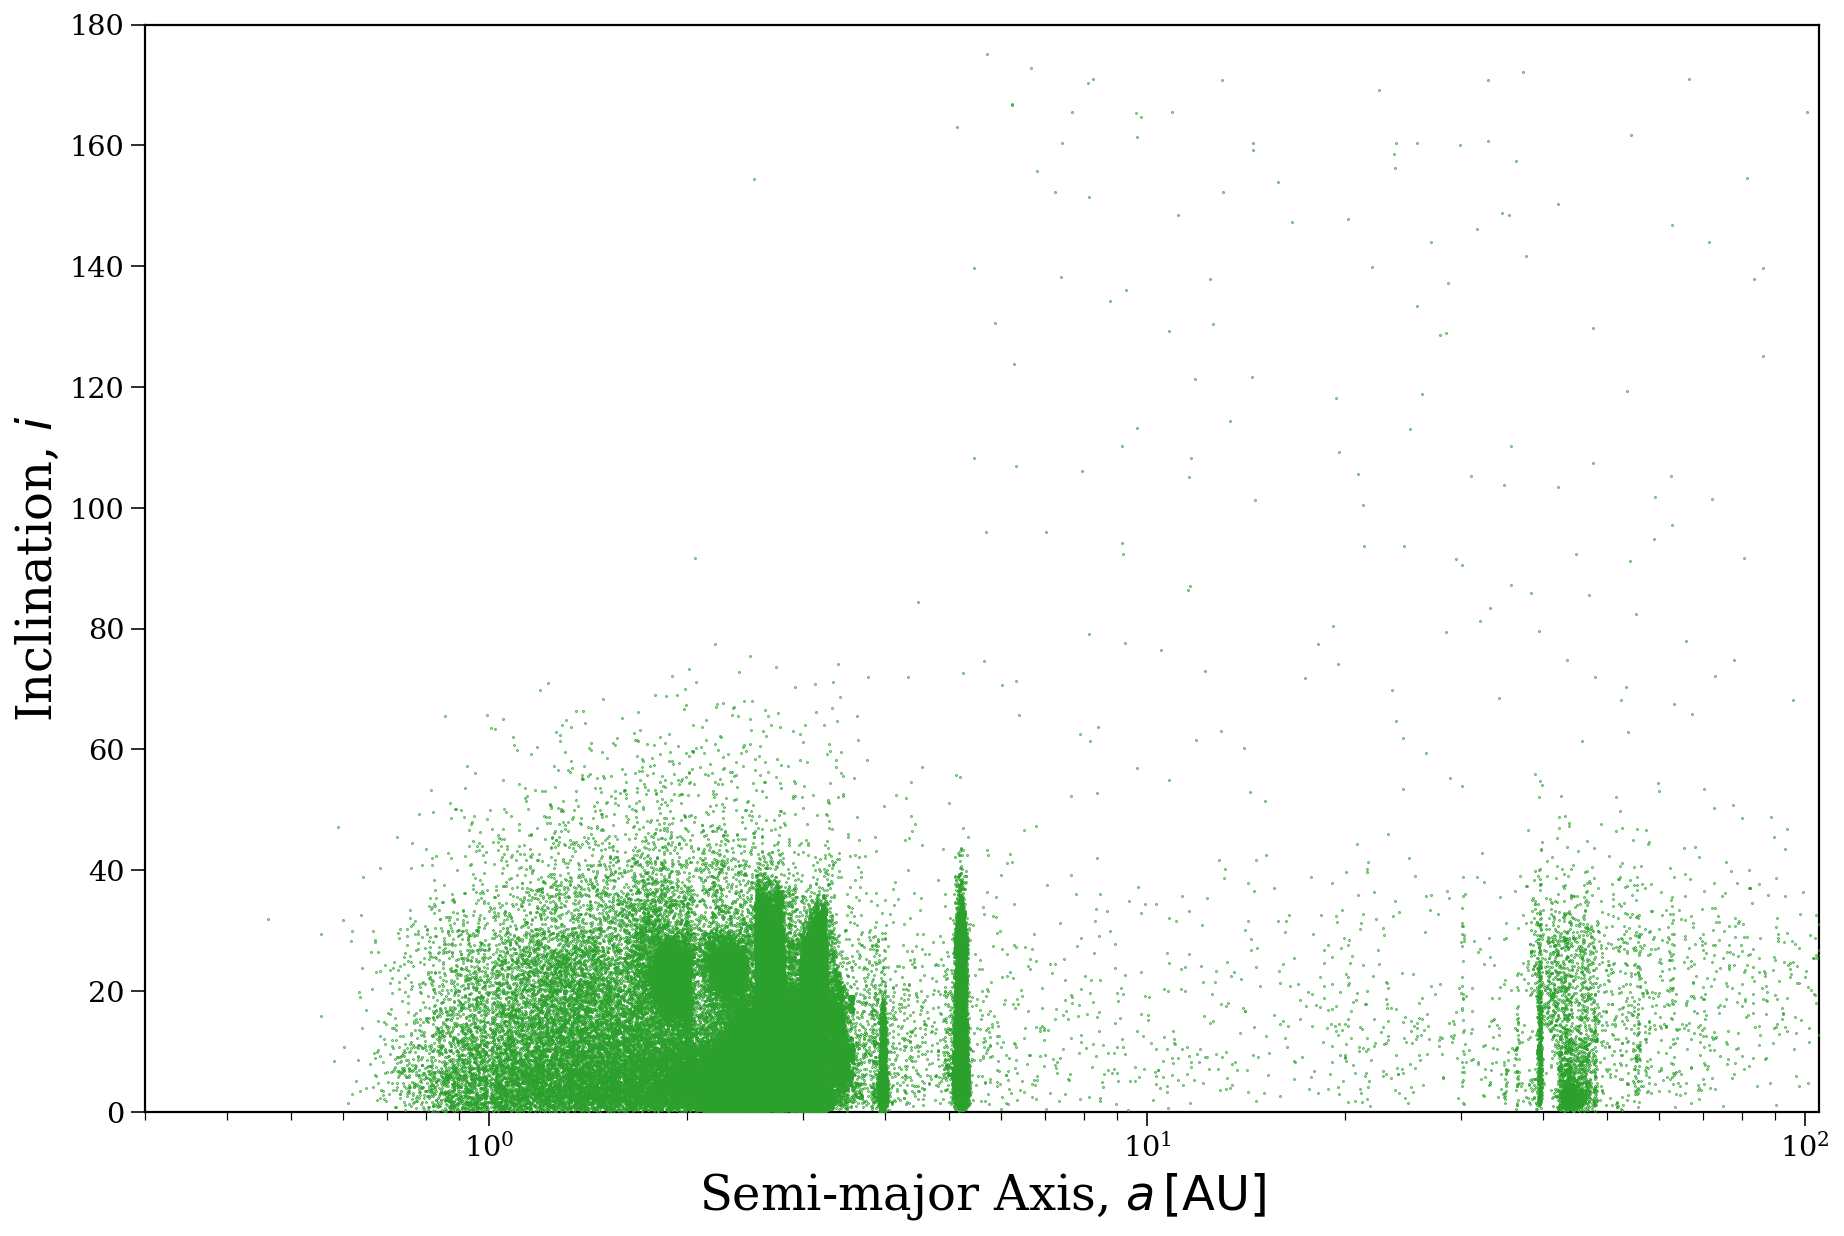

CPU times: user 1.58 s, sys: 34.1 ms, total: 1.61 s
Wall time: 1.61 s


In [60]:
%%time

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(mpcorb.a, mpcorb.i, marker=".", s=0.5, zorder=100, color="tab:green")
ax.set_xscale("log")

xlims = (0.3, 105)
ax.set_xlim(xlims)
ax.set_ylim(0, 180)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()

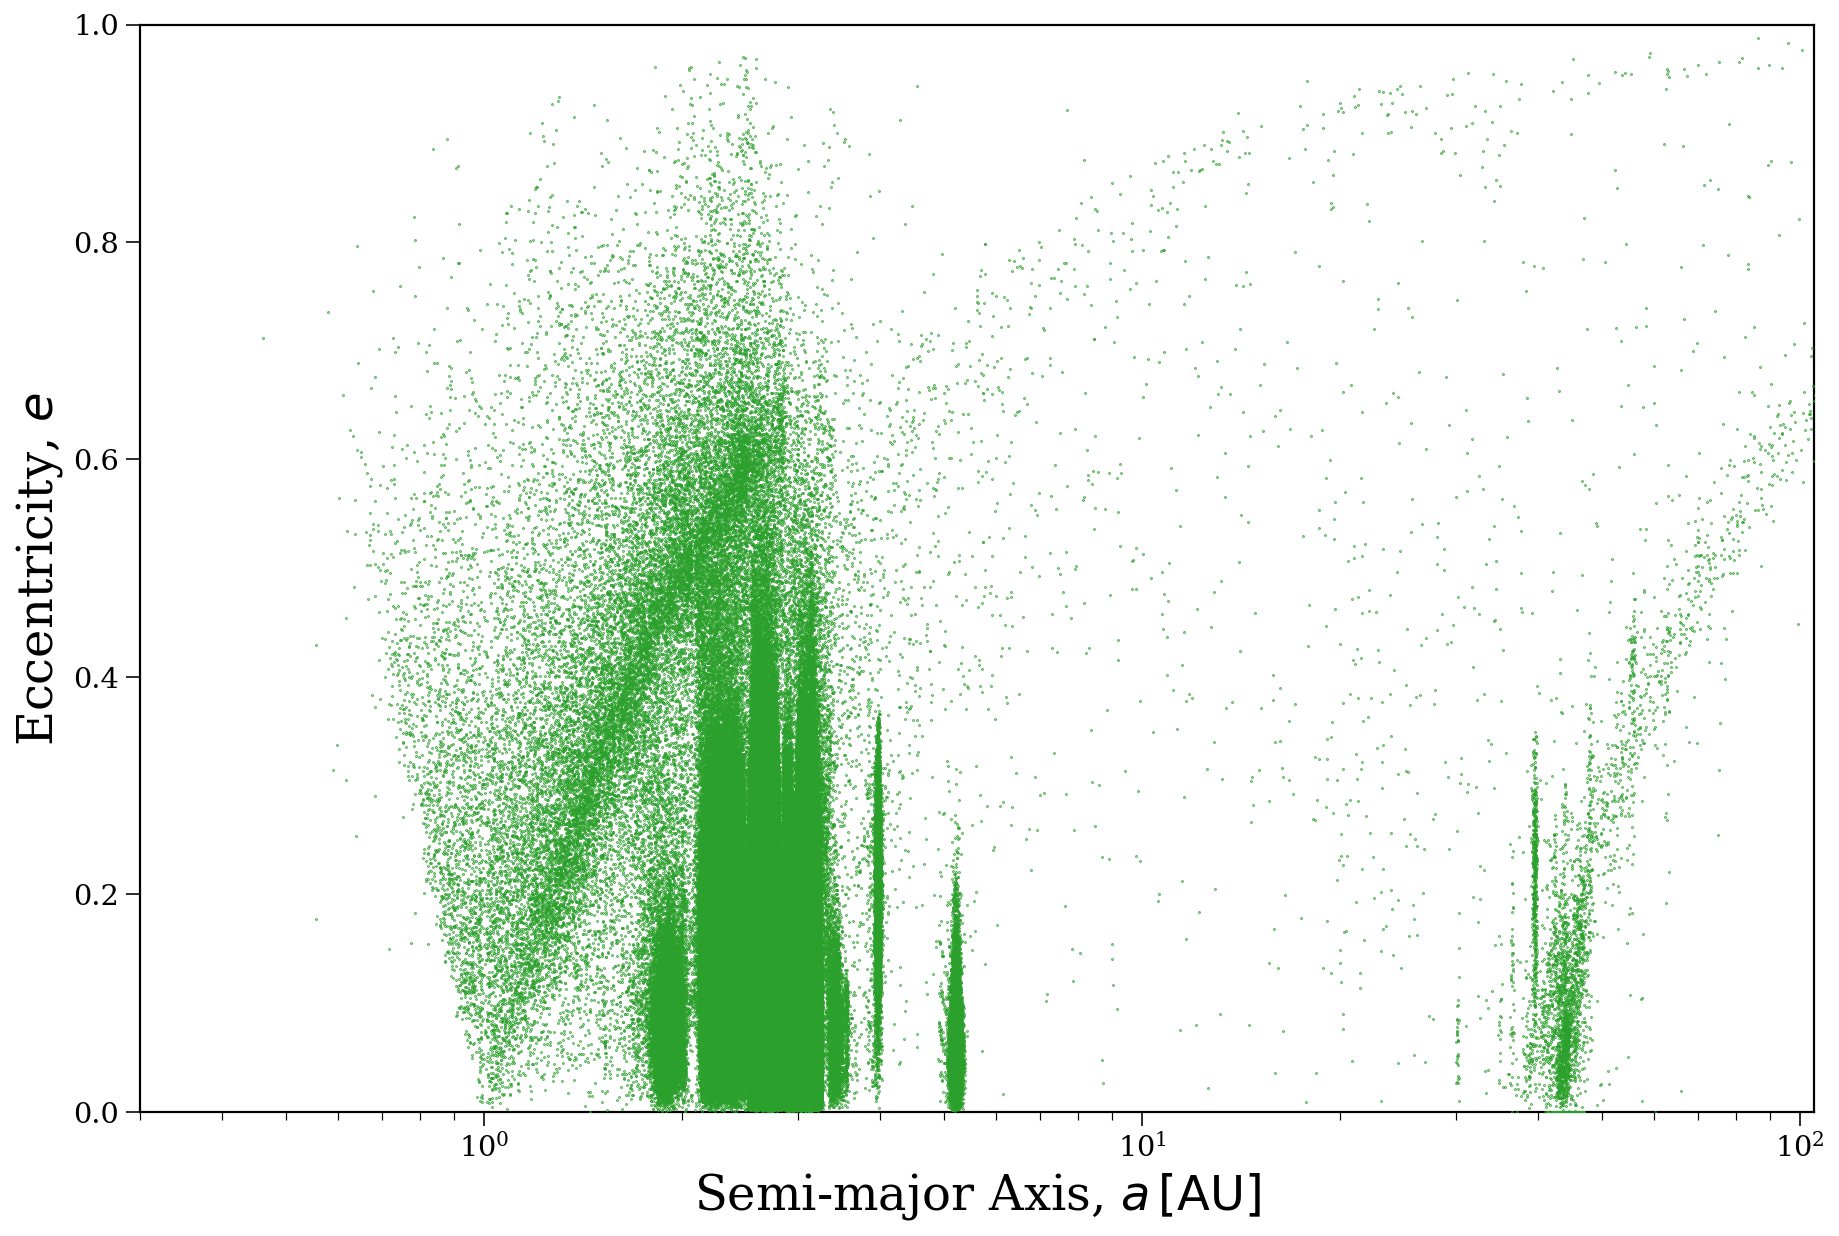

CPU times: user 1.57 s, sys: 62.8 ms, total: 1.63 s
Wall time: 1.63 s


In [59]:
%%time

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(mpcorb.a, mpcorb.e, marker=".", s=0.5, zorder=100, color="tab:green")
ax.set_xscale("log")

xlims = (0.3, 105)
ax.set_xlim(xlims)
ax.set_ylim(0, 1)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Eccentricity, $e$")

plt.show()

In [45]:
random_a = 10**(random_loga)

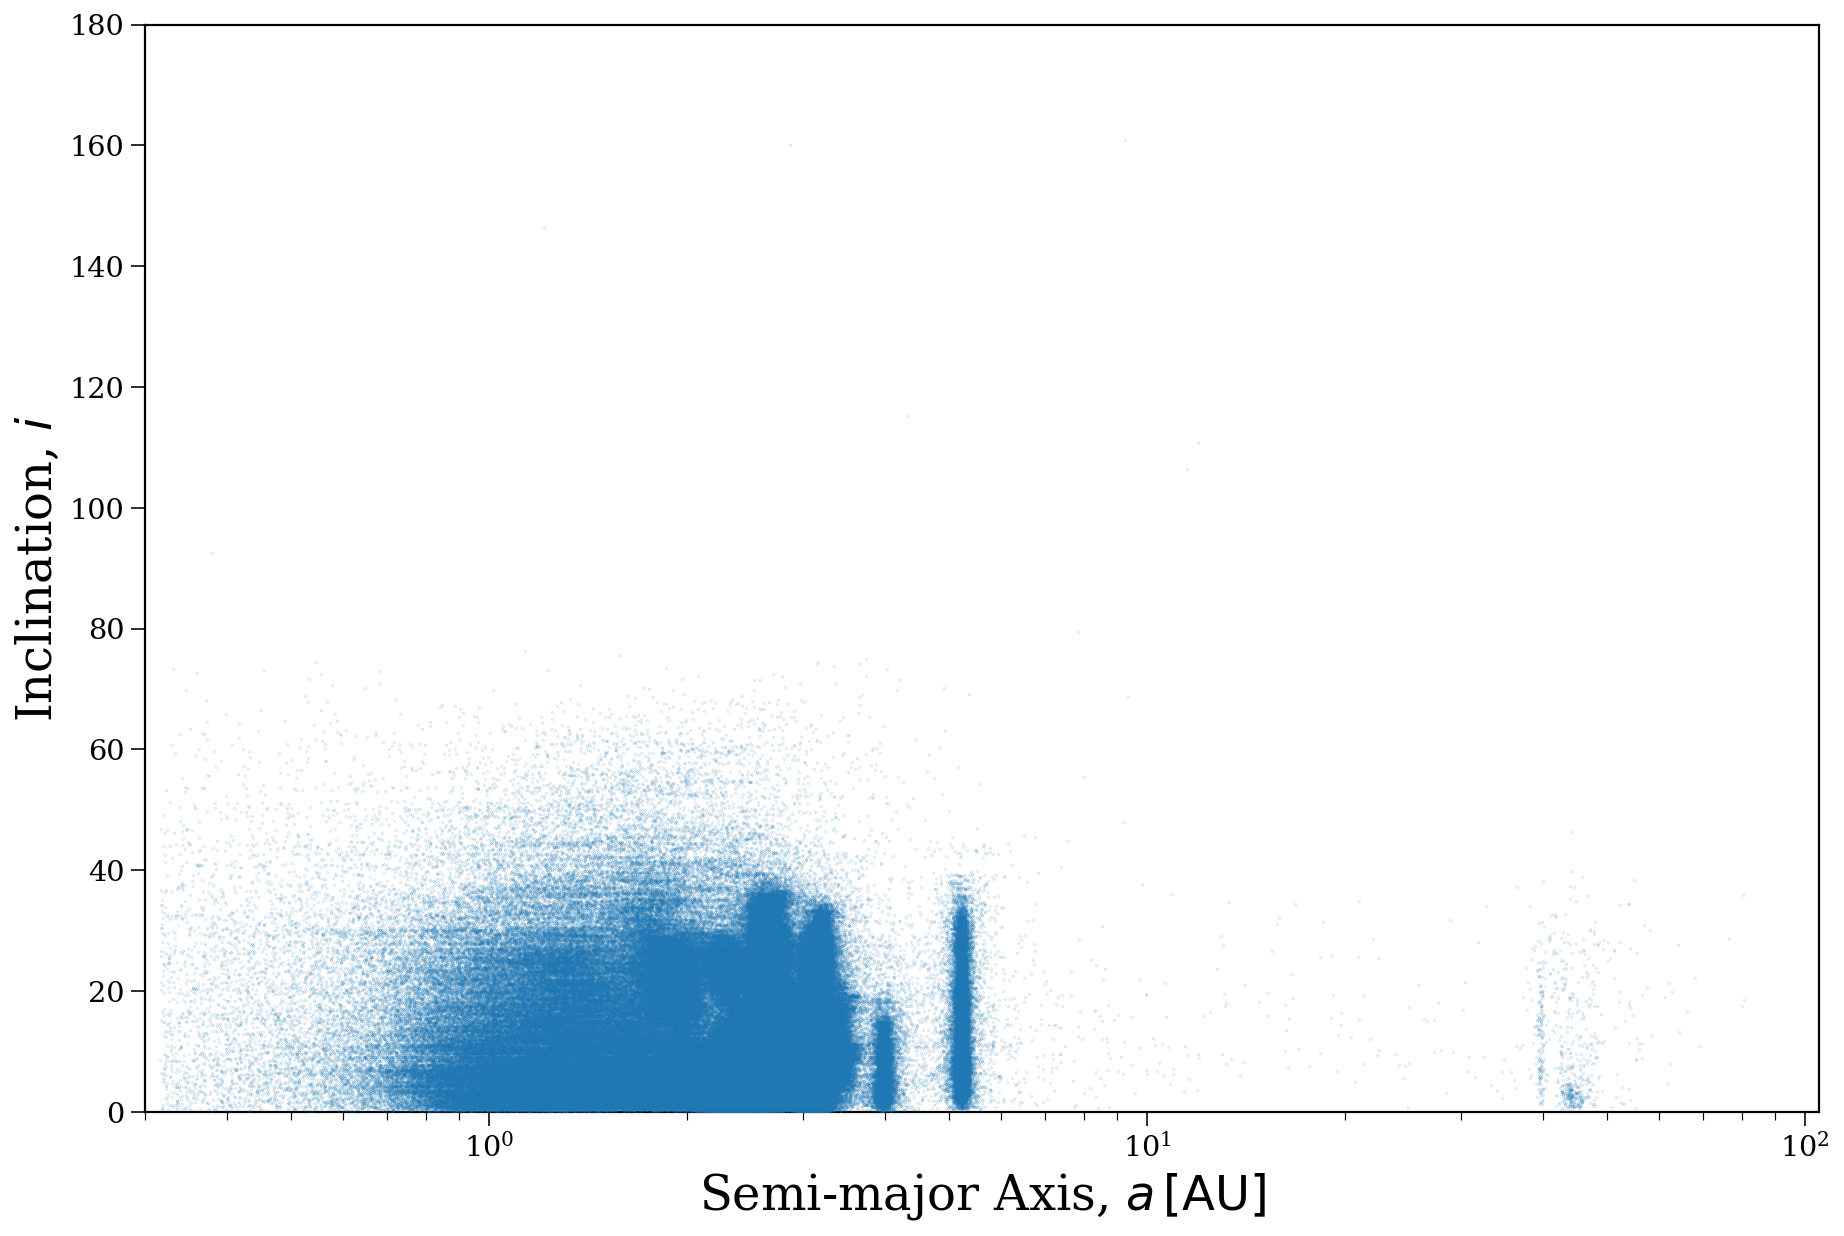

CPU times: user 4.52 s, sys: 506 ms, total: 5.03 s
Wall time: 5.03 s


In [58]:
%%time

fig, ax = plt.subplots(figsize=(15, 10))

# ax.scatter(mpcorb.a, mpcorb.i, marker=".", s=0.5, zorder=100, color="tab:green")
ax.scatter(random_a[::20], random_i[::20], marker=".", s=0.05, zorder=100, color="tab:blue")
ax.set_xscale("log")

xlims = (0.3, 105)
ax.set_xlim(xlims)
ax.set_ylim(0, 180)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()

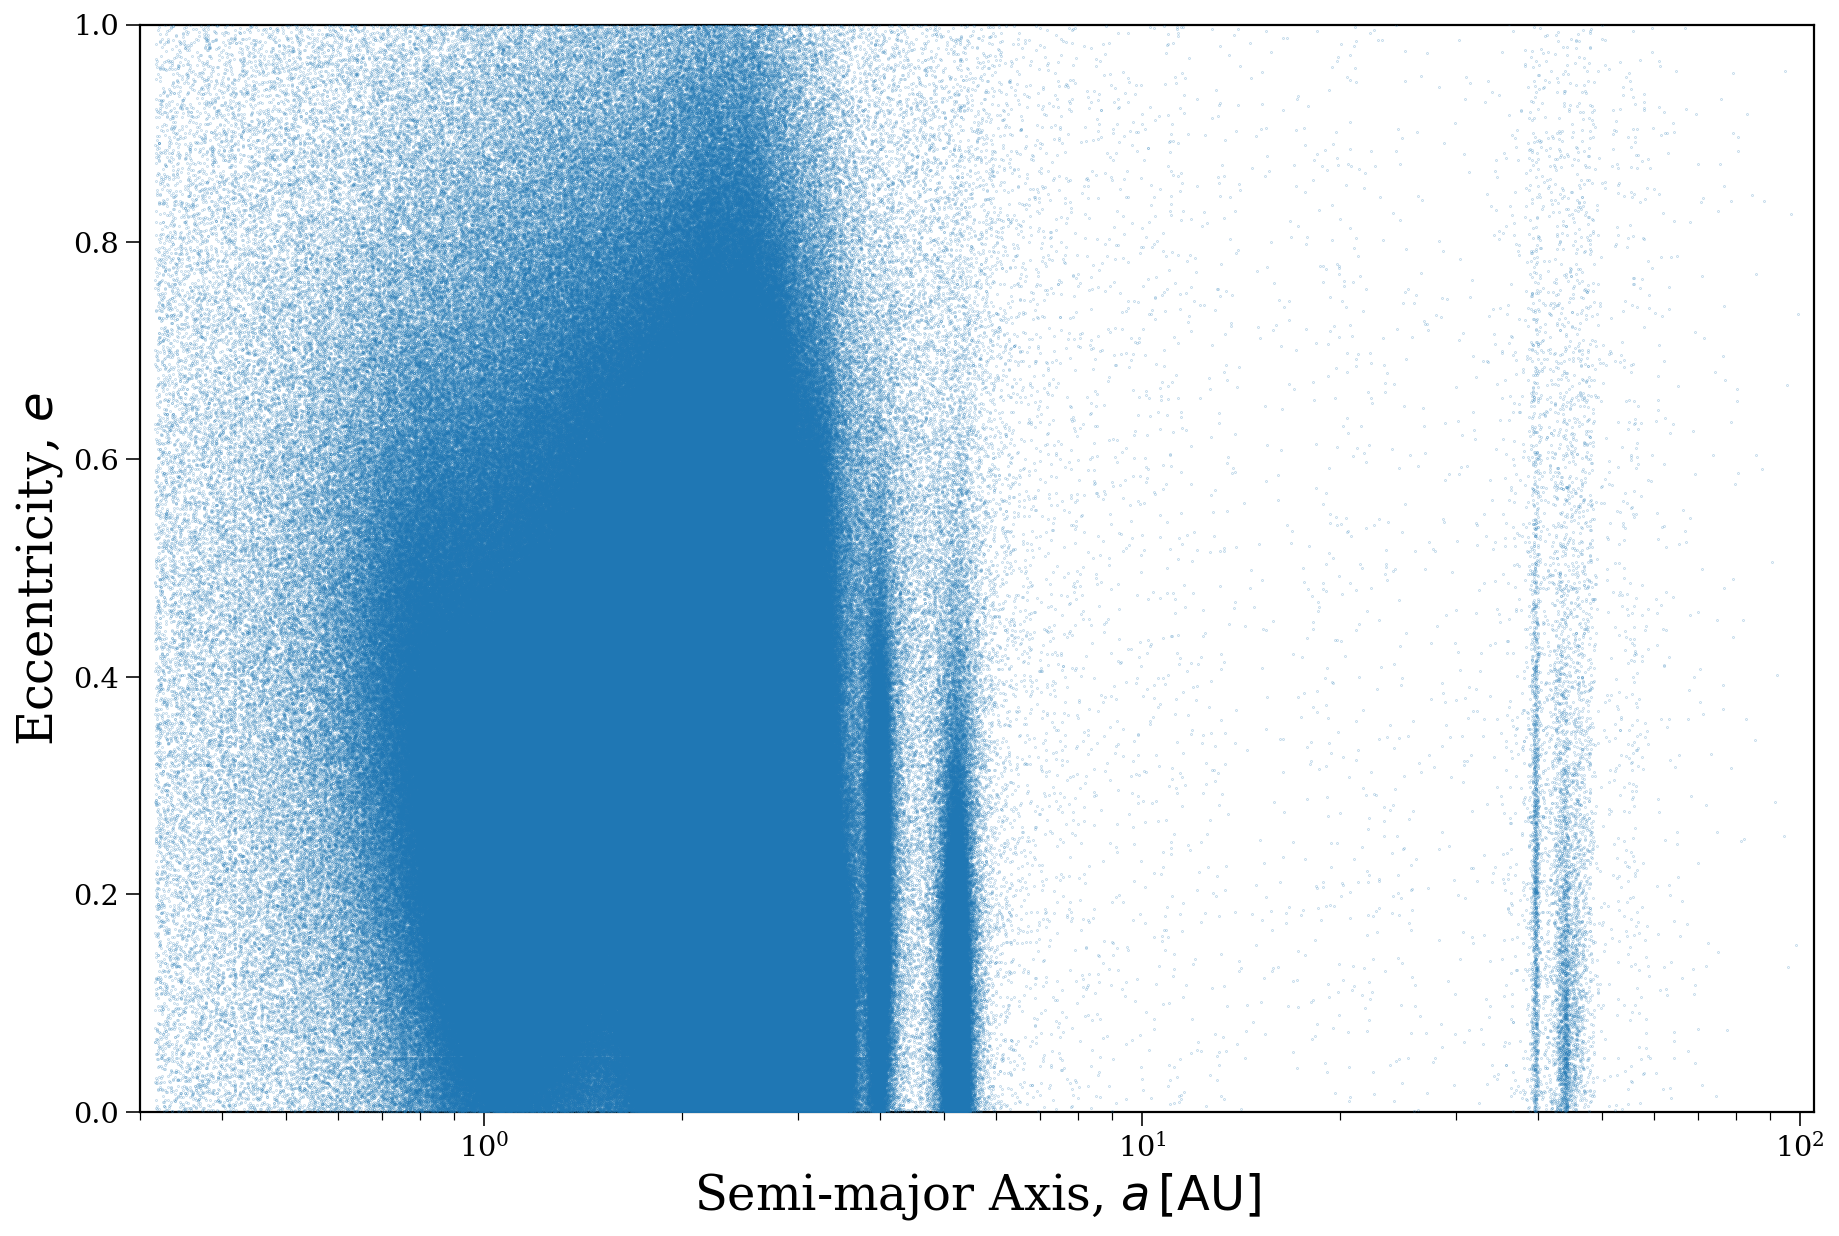

CPU times: user 36.2 s, sys: 7.02 s, total: 43.2 s
Wall time: 43.2 s


In [61]:
%%time

fig, ax = plt.subplots(figsize=(15, 10))

# ax.scatter(mpcorb.a, mpcorb.i, marker=".", s=0.5, zorder=100, color="tab:green")
ax.scatter(random_a[::2], random_e[::2], marker=".", s=0.05, zorder=100, color="tab:blue")
ax.set_xscale("log")

xlims = (0.3, 105)
ax.set_xlim(xlims)
ax.set_ylim(0, 1)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Eccentricity, $e$")

plt.show()

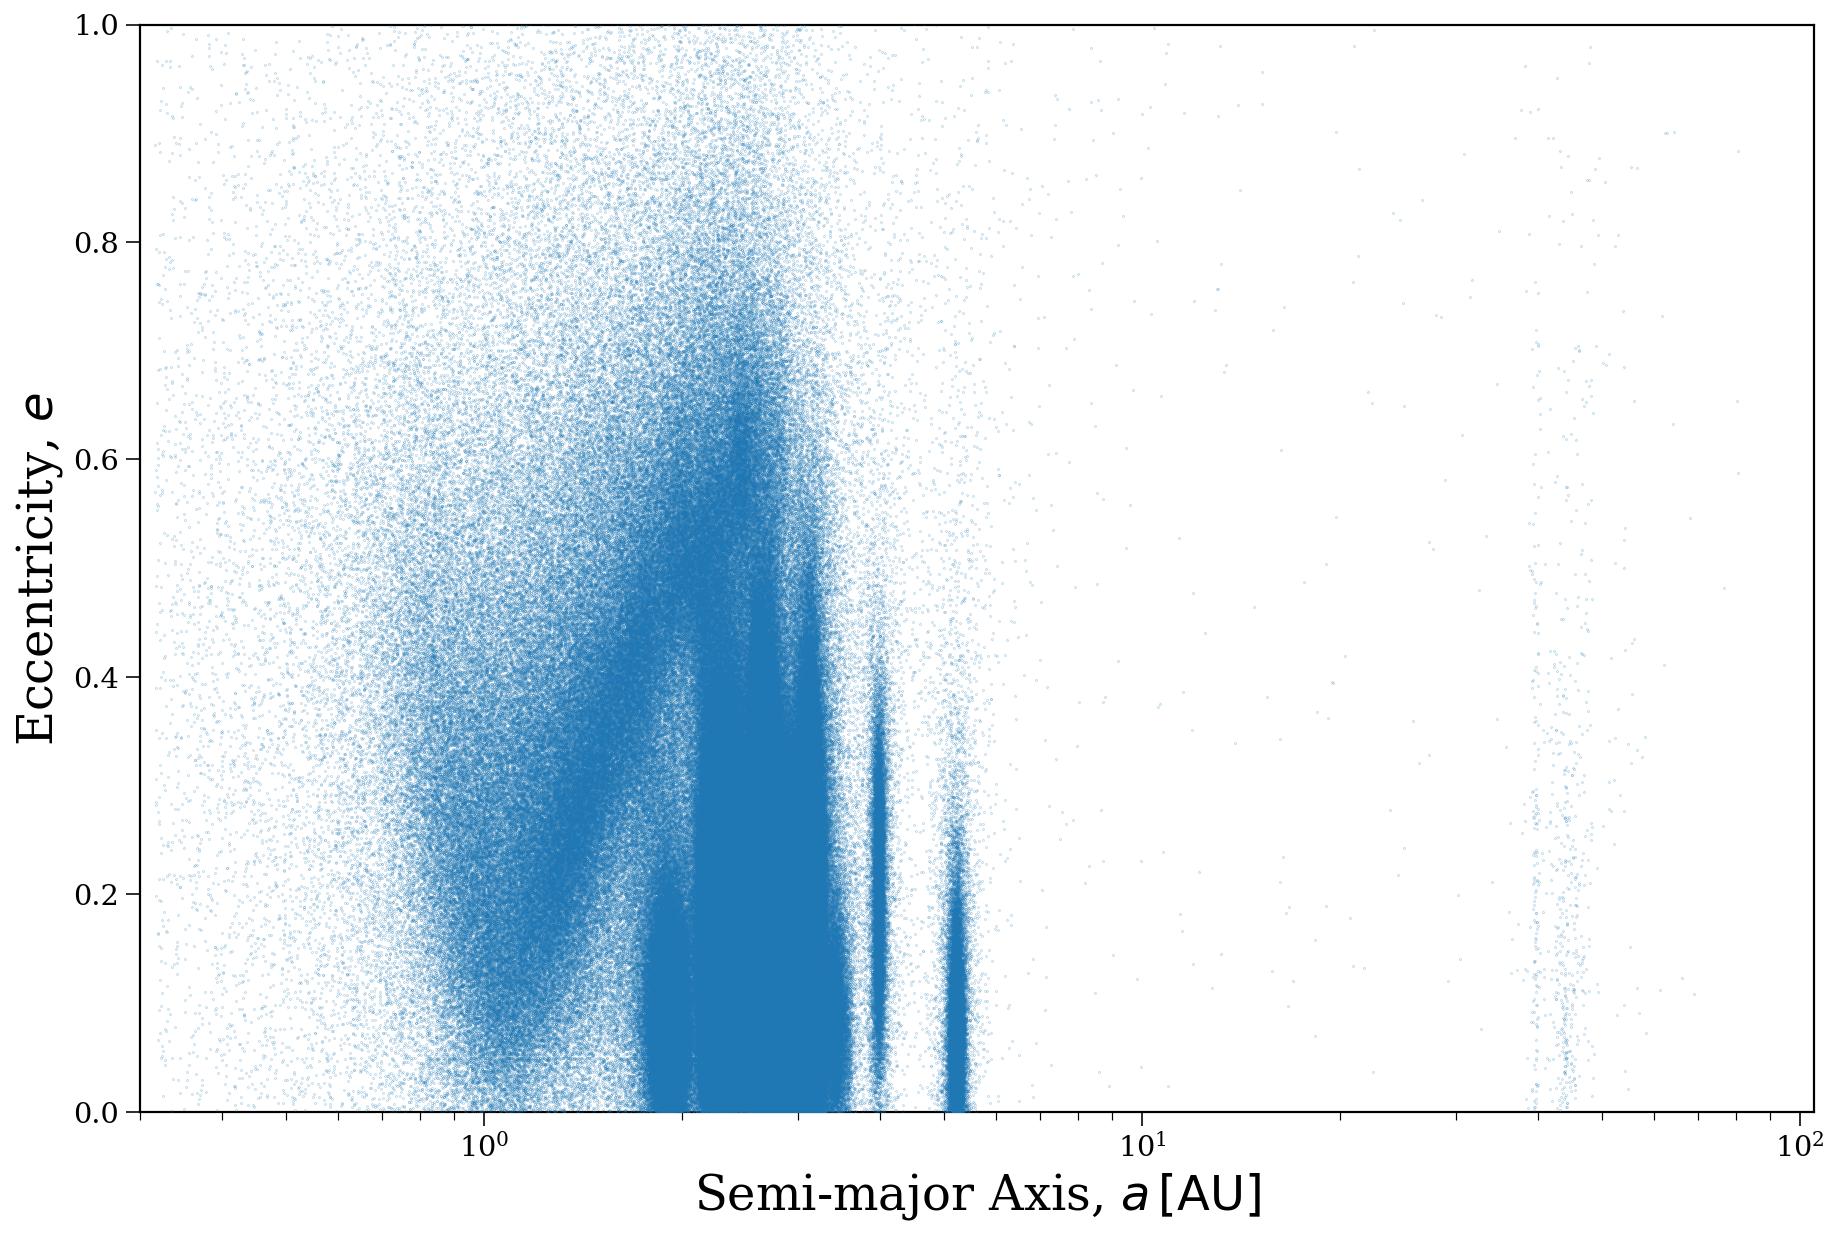

CPU times: user 4.41 s, sys: 563 ms, total: 4.97 s
Wall time: 4.97 s


In [62]:
%%time

fig, ax = plt.subplots(figsize=(15, 10))

# ax.scatter(mpcorb.a, mpcorb.i, marker=".", s=0.5, zorder=100, color="tab:green")
ax.scatter(random_a[::20], random_e[::20], marker=".", s=0.05, zorder=100, color="tab:blue")
ax.set_xscale("log")

xlims = (0.3, 105)
ax.set_xlim(xlims)
ax.set_ylim(0, 1)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Eccentricity, $e$")

plt.show()